In [1]:
# gridWorld from buomsoo-kim / Tabular-RL-with-Python

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

from gridWorldEnvironment import GridWorld

In [3]:
# creating gridworld environment
gw = GridWorld(gamma = 1.0, theta = 0.5)

### Create Policy

- Create equiprobable random policy
    - Function returns list of (action, probability) tuples

In [4]:
def pi(current_state, env):
    possible_actions = []
    for transition in env.transitions:
        if current_state == transition[0]:
            possible_actions.append(transition[1])
    return [(action, 0.25) for action in possible_actions]

### Create and initialize value array

- Values in indices 0 and -1 are for terminal states ((0,0) & (3,3))

In [5]:
def value_array(env):
    return np.zeros(len(env.states)+2)

### Evaluate policy

In [6]:
def policy_evaluation(policy, env):
    values = value_array(env)
    i = 0
    done = False
    while not done:
        delta = 0
        for state in env.states:
            v = values[state]
            values[state] = 0
            for action, prob in pi(state, env):
                next_state, reward = env.state_transition(state, action)
                values[state] += prob * (reward + env.gamma * values[next_state]) 
            delta = max(delta, np.abs(v - values[state]))
        i += 1
            
        # terminating condition
        if delta < env.theta:
            print("Policy evaluation terminated at {}the iteration".format(i+1))
            done = True
    return values

In [7]:
values = policy_evaluation(pi, gw)

Policy evaluation terminated at 8the iteration


In [8]:
values.reshape(4,4)

array([[ 0.        , -3.60015981, -4.42900918, -3.85857433],
       [-5.0841953 , -6.51459585, -6.65647916, -5.36081249],
       [-6.65360973, -7.33230388, -6.71681448, -4.47945752],
       [-5.64060656, -5.89090474, -4.63423071,  0.        ]])

### Visualizing values

- Visualizing values in table
    - lighter color in table means higher value for random policy

In [9]:
def show_values(values):
    if values.shape != (4,4):
        values = values.reshape(4,4)
    ax = seaborn.heatmap(values, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
    plt.show()

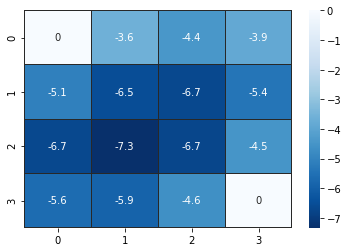

In [10]:
show_values(values)

### Improve policy

- policy_improvement() function performs one round of policy improvement (i.e., one update for each state)
    - After one round of improvement, policy reaches near optimal (but not perfect)

In [11]:
# one round of policy improvement
def policy_improvement(env, values):
    new_policy = []
    for state in env.states:
        temp = []
        for action in env.actions:
            next_state, _ = env.state_transition(state, action)
            temp.append(values[next_state])
        temp = np.asarray(temp)
        best_action = env.actions[np.argmax(temp)]
        new_policy.append(best_action)
    return new_policy

In [12]:
values = policy_evaluation(pi, gw)
new_pi = policy_improvement(gw, values)

Policy evaluation terminated at 8the iteration


In [13]:
# improved policy after one improvement
new_pi.insert(0, "T")
new_pi.append("T")
new_pi = np.asarray(new_pi)
print(new_pi.reshape(4,4))

[['T' 'L' 'L' 'U']
 ['U' 'U' 'U' 'U']
 ['U' 'D' 'R' 'D']
 ['D' 'R' 'R' 'T']]
